In [1]:
# Libraries
import scikit_posthocs as sp
import numpy as np
import scipy.stats as stt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import source as so
import pandas as pd
from collections import Counter
import pandoc
import random as rm

# Vertical stratification in each trap

In [4]:
conteo=pd.read_excel("Material suplementario 2.xlsx")

In [7]:
riqueza_L=list(conteo[conteo["Height"]=="L"]["Richness"])
riqueza_M=list(conteo[conteo["Height"]=="M"]["Richness"])
riqueza_H=list(conteo[conteo["Height"]=="H"]["Richness"])

In [8]:
stt.kruskal(riqueza_L,riqueza_M,riqueza_H)

KruskalResult(statistic=332.36547585639835, pvalue=6.725954579798684e-73)

In [9]:
lista=[riqueza_L,riqueza_M,riqueza_H]
names=["low", "medium", "high"]
summary=pd.DataFrame({"names":names,
             "median":[np.median(e) for e in lista],
             "mean":[np.mean(e) for e in lista]})

In [23]:
summary

,names,median,mean
0,low,3.0,5.011976
1,medium,2.0,3.467053
2,high,2.0,2.763933


In [17]:
lista=[]
for e in conteo["Height"].unique():
    conti=conteo[conteo["Height"]==e]
    indice_no_out=list(so.out_df(conti["Richness"]).index)
    lista=lista+indice_no_out
conteop=conteo.drop(index=lista)
conteop=pd.concat([conteop[conteop["Height"]=="L"],
                   conteop[conteop["Height"]=="M"],
                   conteop[conteop["Height"]=="H"]], axis=0)

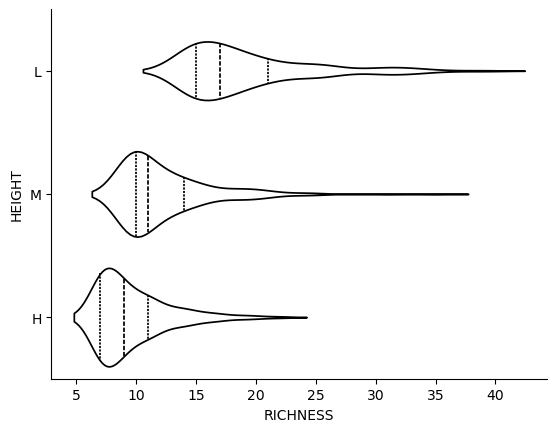

In [18]:
ax = plt.axes()
sns.violinplot(x="Richness", y="Height",
               legend=False, split=False, data=conteop, 
               inner="quart",
               linecolor="black", saturation=0.8, color="white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('RICHNESS')
plt.ylabel('HEIGHT')
plt.savefig("richness-height.svg", dpi=300)

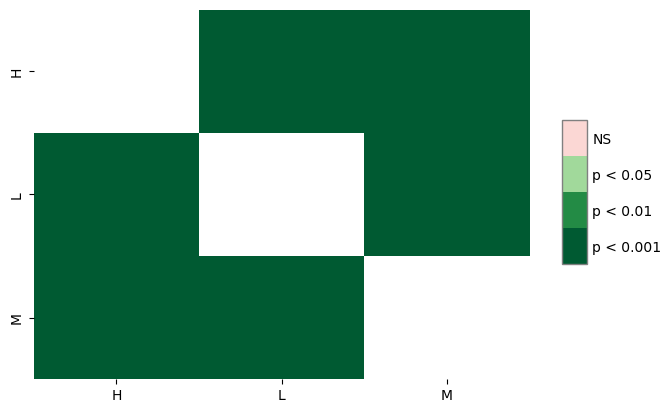

In [128]:
### prueba posthoc del kruskall wallis
pc = sp.posthoc_dunn(conteo, val_col="abundace", group_col="height")
sp.sign_plot(pc)
plt.savefig("sign_plot_richness-height.tiff", dpi=300)

In [26]:
### para poder observar la correlacion entre los datos 
stt.spearmanr(conteo2 ['height'], conteo2 ['richness'])

SignificanceResult(statistic=-0.20781615356134417, pvalue=1.883190699588369e-75)

# To the Abundace

In [21]:
abu_L=list(conteo[conteo["Height"]=="L"]["Abundance"])
abu_M=list(conteo[conteo["Height"]=="M"]["Abundance"])
abu_H=list(conteo[conteo["Height"]=="H"]["Abundance"])

In [40]:
stt.kruskal(abu_L,abu_M,abu_H)

KruskalResult(statistic=389.6941749301273, pvalue=2.3932336412011108e-85)

In [22]:
lista=[abu_L,abu_M,abu_H]
names=["low", "medium", "high"]
summary=pd.DataFrame({"names":names,
             "median":[np.median(e) for e in lista],
             "mean":[np.mean(e) for e in lista]})

In [23]:
summary

,names,median,mean
0,low,4.0,6.755917
1,medium,2.0,4.243544
2,high,2.0,3.235542


In [24]:
lista=[]
for e in conteo["Height"].unique():
    conti=conteo[conteo["Height"]==e]
    indice_no_out=list(so.out_df(conti["Abundance"]).index)
    lista=lista+indice_no_out
conteop=conteo.drop(index=lista)
conteop=pd.concat([conteop[conteop["Height"]=="L"],
                   conteop[conteop["Height"]=="M"],
                   conteop[conteop["Height"]=="H"]], axis=0)

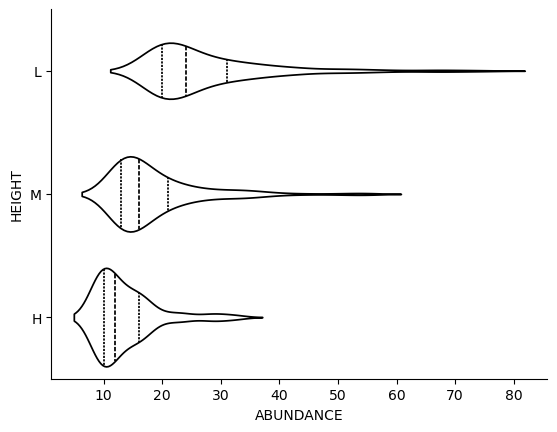

In [27]:
ax = plt.axes()
sns.violinplot(x="Abundance", y="Height",
               legend=False, split=False, data=conteop, 
               inner="quart", 
               linecolor="black", saturation=0.8, color="white")


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('ABUNDANCE')
plt.ylabel('HEIGHT')
plt.savefig("abundance-height.svg", dpi=300)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x24711263dd0>)

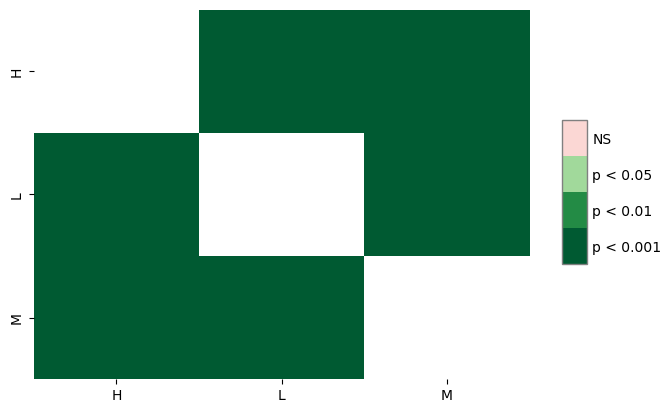

In [32]:
### prueba posthoc del kruskall wallis
pc = sp.posthoc_dunn(conteo, val_col="abundace", group_col="height",p_adjust="holm")
sp.sign_plot(pc)

In [33]:
new=[]
for e in conteo["height"]:
    if e == "L":
        new.append(0)
    if e == "M":
        new.append(1)
    if e == "H":
        new.append(2)
conteo["new_height"]=new

In [34]:
### para poder observar la correlacion entre los datos 
stt.spearmanr(conteo ['new_height'], conteo ['abundace'])

SignificanceResult(statistic=-0.2245981231329207, pvalue=3.885939488460765e-88)

# To the Disturbance gradient

In [30]:
riqueza_CCR=list(conteo[conteo["Habitat/Forest"]=="CCR"]["Richness"])
riqueza_PCR=list(conteo[conteo["Habitat/Forest"]=="PCR"]["Richness"])
riqueza_SLR=list(conteo[conteo["Habitat/Forest"]=="SLR"]["Richness"])

In [31]:
stt.kruskal(riqueza_CCR,riqueza_PCR,riqueza_SLR)

KruskalResult(statistic=121.77466217381354, pvalue=3.605521512488282e-27)

In [32]:
lista=[riqueza_CCR,riqueza_PCR,riqueza_SLR]
names=["CCR", "PCR", "SLR"]
summary=pd.DataFrame({"names":names,
             "median":[np.median(e) for e in lista],
             "mean":[np.mean(e) for e in lista]})

In [33]:
summary

,names,median,mean
0,CCR,2.0,3.392081
1,PCR,2.0,3.889853
2,SLR,3.0,4.529151


In [34]:
lista=[]
for e in conteo["Habitat/Forest"].unique():
    conti=conteo[conteo["Habitat/Forest"]==e]
    indice_no_out=list(out_df(conti["Richness"]).index)
    lista=lista+indice_no_out
conteop=conteo.drop(index=lista)
conteop=pd.concat([conteop[conteop["Habitat/Forest"]=="CCR"],
                   conteop[conteop["Habitat/Forest"]=="PCR"],
                   conteop[conteop["Habitat/Forest"]=="SLR"]], axis=0)

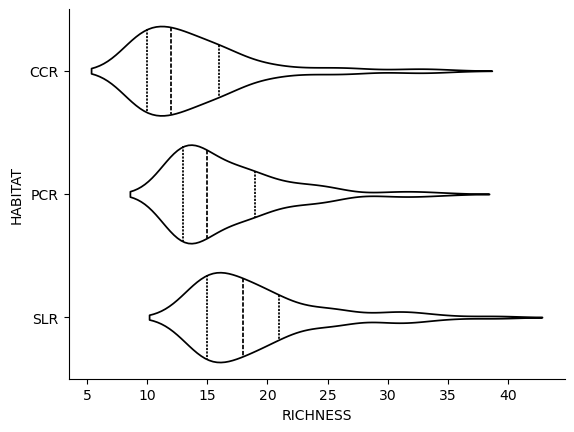

In [36]:
ax = plt.axes()
sns.violinplot(x="Richness", y="Habitat/Forest",
               legend=False, split=False, data=conteop, 
               inner="quart", 
               linecolor="black", saturation=0.8, color="white")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('RICHNESS')
plt.ylabel('HABITAT')
plt.savefig("riqueza-habitat.svg", dpi=300)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x24711b30790>)

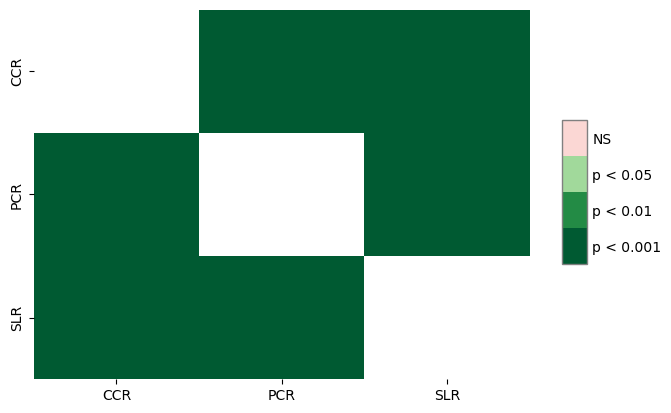

In [41]:
### prueba posthoc del kruskall wallis
pc = sp.posthoc_dunn(conteo, val_col="richness", group_col="habitat",p_adjust="holm")
sp.sign_plot(pc)

In [42]:
new=[]
for e in conteo['habitat']:
    if e == "CCR":
        new.append(2)
    if e == "PCR":
        new.append(1)
    if e == "SLR":
        new.append(0)
conteo["new_habitat"]=new

In [43]:
### para poder observar la correlacion entre los datos 
stt.spearmanr(conteo ['new_habitat'], conteo['richness'])

SignificanceResult(statistic=-0.1257745602111716, pvalue=2.2800748401025155e-28)

### To the Abundance

In [37]:
conteo["Habitat/Forest"].unique()

array(['CCR', 'PCR', 'SLR'], dtype=object)

In [39]:
abu_ccr=list(conteo[conteo["Habitat/Forest"]=='CCR']["Abundance"])
abu_pcr=list(conteo[conteo["Habitat/Forest"]=='PCR']["Abundance"])
abu_slr=list(conteo[conteo["Habitat/Forest"]=='SLR']["Abundance"])

In [45]:
stt.kruskal(abu_ccr,abu_pcr,abu_slr)

KruskalResult(statistic=114.1890798801451, pvalue=1.6001340144647132e-25)

In [47]:
lista=[abu_ccr,abu_pcr,abu_slr]
names=["CCR", "PCR", "SLR"]
summary=pd.DataFrame({"names":names,
             "median":[np.median(e) for e in lista],
             "mean":[np.mean(e) for e in lista]})

In [48]:
summary

,names,median,mean
0,CCR,2.0,4.454370
1,PCR,3.0,4.873633
2,SLR,3.0,5.875554


In [40]:
lista=[]
for e in conteo["Habitat/Forest"].unique():
    conti=conteo[conteo["Habitat/Forest"]==e]
    indice_no_out=list(out_df(conti["Abundance"]).index)
    lista=lista+indice_no_out
conteop=conteo.drop(index=lista)
conteop=pd.concat([conteop[conteop["Habitat/Forest"]=="CCR"],
                   conteop[conteop["Habitat/Forest"]=="PCR"],
                   conteop[conteop["Habitat/Forest"]=="SLR"]], axis=0)

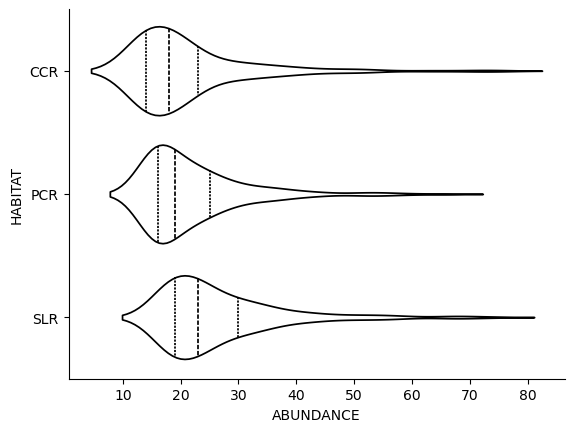

In [42]:
ax = plt.axes()
sns.violinplot(x="Abundance", y="Habitat/Forest",
               legend=False, split=False, data=conteop, 
               inner="quart", 
               linecolor="black", saturation=0.8, color="white")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('ABUNDANCE')
plt.ylabel('HABITAT')
plt.savefig("abundance-habitat.svg", dpi=300)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x24711b84fd0>)

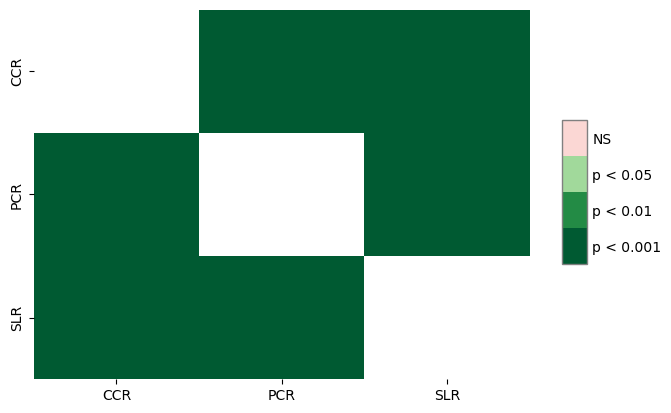

In [50]:
### prueba posthoc del kruskall wallis
pc = sp.posthoc_dunn(conteo, val_col="abundace", group_col="habitat",p_adjust="holm")
sp.sign_plot(pc)

In [51]:
### para poder observar la correlacion entre los datos 
stt.spearmanr(conteo ['new_habitat'], conteo['abundace'])

SignificanceResult(statistic=-0.121864249667857, pvalue=1.0132697378118679e-26)

# To the Climatic season

In [43]:
conteo["Temporade"].unique()

array(['secas', 'intermedio', 'lluvias'], dtype=object)

In [44]:
riqueza_secas=list(conteo[conteo["Temporade"]=='secas']["Richness"])
riqueza_int=list(conteo[conteo["Temporade"]=='intermedio']["Richness"])
riqueza_lluv=list(conteo[conteo["Temporade"]=='lluvias']["Richness"])

In [54]:
stt.kruskal(riqueza_secas,riqueza_int,riqueza_lluv)

KruskalResult(statistic=66.2370186521832, pvalue=4.138225483676546e-15)

In [55]:
lista=[riqueza_secas,riqueza_int,riqueza_lluv]
names=["secas", "intermedio", "lluvias"]
summary=pd.DataFrame({"names":names,
             "median":[np.median(e) for e in lista],
             "mean":[np.mean(e) for e in lista]})

In [56]:
summary

,names,median,mean
0,secas,2.0,3.689577
1,intermedio,3.0,4.807778
2,lluvias,2.0,3.644765


In [45]:
lista=[]
for e in conteo["Temporade"].unique():
    conti=conteo[conteo["Temporade"]==e]
    indice_no_out=list(out_df(conti["Richness"]).index)
    lista=lista+indice_no_out
conteop=conteo.drop(index=lista)
conteop=pd.concat([conteop[conteop["Temporade"]=="secas"],
                   conteop[conteop["Temporade"]=="intermedio"],
                   conteop[conteop["Temporade"]=="lluvias"]], axis=0)

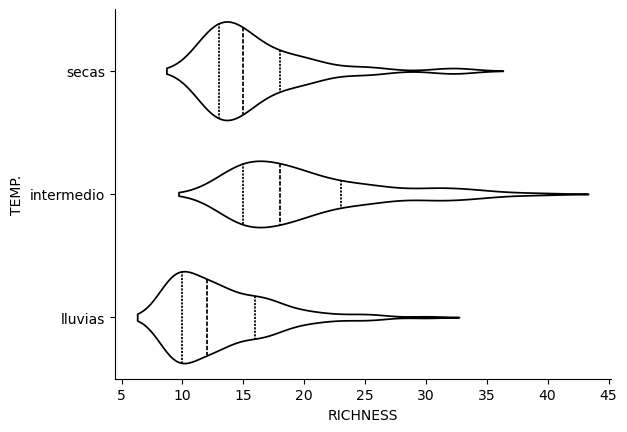

In [46]:
ax = plt.axes()
sns.violinplot(x="Richness", y="Temporade",
               legend=False, split=False, data=conteop, 
               inner="quart", 
               linecolor="black", saturation=0.8, color="white")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('RICHNESS')
plt.ylabel('TEMP.')
plt.savefig("RICHNESS-TEMPORADA.svg", dpi=300, bbox_inches="tight")
plt.show()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x24713194890>)

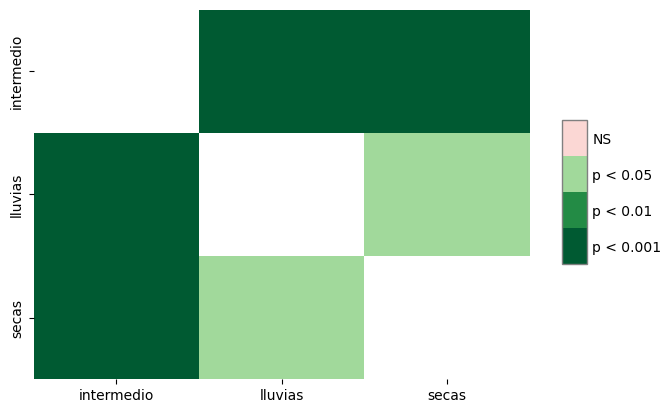

In [58]:
### prueba posthoc del kruskall wallis
pc = sp.posthoc_dunn(conteo, val_col="richness", group_col="temporada",p_adjust="holm")
sp.sign_plot(pc)

##### To the Abundance

In [59]:
conteo["temporada"].unique()

array(['secas', 'intermedio', 'lluvias'], dtype=object)

In [47]:
abu_secas=list(conteo[conteo["Temporade"]=='secas']["Abundance"])
abu_int=list(conteo[conteo["Temporade"]=='intermedio']["Abundance"])
abu_lluv=list(conteo[conteo["Temporade"]=='lluvias']["Abundance"])

In [61]:
stt.kruskal(abu_secas,abu_int,abu_lluv)

KruskalResult(statistic=67.5105571621768, pvalue=2.189116009745296e-15)

In [62]:
lista=[abu_secas,abu_int,abu_lluv]
names=["secas", "intermedio", "lluvias"]
summary=pd.DataFrame({"names":names,
             "median":[np.median(e) for e in lista],
             "mean":[np.mean(e) for e in lista]})

In [63]:
summary

,names,median,mean
0,secas,3.0,4.769260
1,intermedio,3.0,6.429593
2,lluvias,2.0,4.464260


In [48]:
lista=[]
for e in conteo["Temporade"].unique():
    conti=conteo[conteo["Temporade"]==e]
    indice_no_out=list(out_df(conti["Abundance"]).index)
    lista=lista+indice_no_out
conteop=conteo.drop(index=lista)
conteop=pd.concat([conteop[conteop["Temporade"]=="secas"],
                   conteop[conteop["Temporade"]=="intermedio"],
                   conteop[conteop["Temporade"]=="lluvias"]], axis=0)

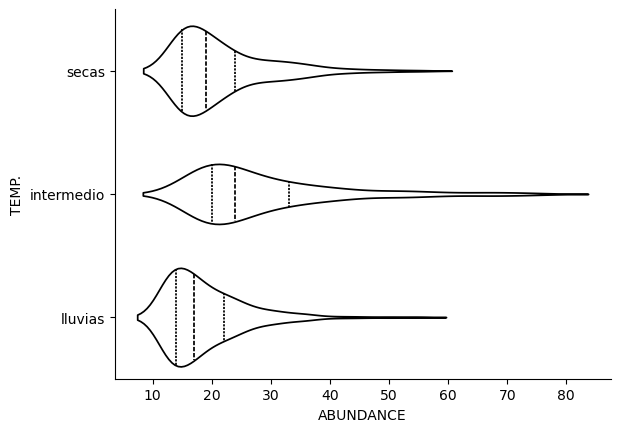

In [50]:
ax = plt.axes()
sns.violinplot(x="Abundance", y="Temporade",
               legend=False, split=False, data=conteop, 
               inner="quart", 
               linecolor="black", saturation=0.8, color="white")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('ABUNDANCE')
plt.ylabel('TEMP.')
plt.savefig("ABUNDACE-TEMPORADA.svg", dpi=300, bbox_inches="tight")

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x247133e5690>)

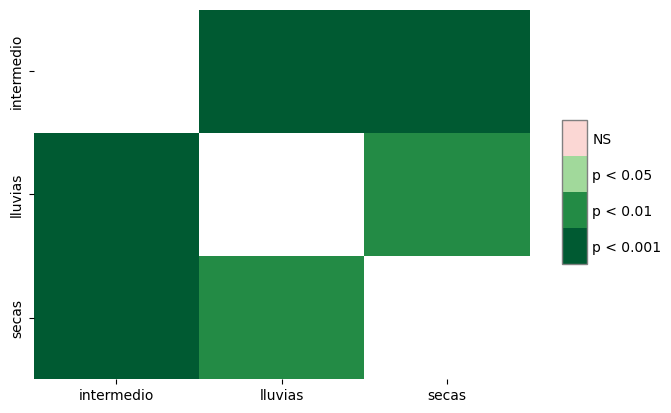

In [65]:
### prueba posthoc del kruskall wallis
pc = sp.posthoc_dunn(conteo, val_col="abundace", group_col="temporada",p_adjust="holm")
sp.sign_plot(pc)